In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from lifelines import KaplanMeierFitter
from lifelines import GeneralizedGammaFitter
from lifelines import CoxPHFitter

from lifelines.statistics import logrank_test


#load dataset and view first few lines

qa = pd.read_csv('C:/data_ecommerce_customer_churn.csv', encoding='ISO-8859-1')

qa.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


In [2]:
# Get information about the dataset

pd.set_option('display.float_format', lambda x: '%.2f' % x)
qa.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


In [4]:
# Check missing values

print(qa.isnull().sum())

Tenure                      194
WarehouseToHome             169
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
NumberOfAddress               0
Complain                      0
DaySinceLastOrder           213
CashbackAmount                0
Churn                         0
dtype: int64


In [5]:
# Replace Tenure with averages

ave = qa['Tenure'].mean()
qa['Tenure'] = qa['Tenure'].fillna(ave)

print(qa.isnull().sum())


Tenure                        0
WarehouseToHome             169
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
NumberOfAddress               0
Complain                      0
DaySinceLastOrder           213
CashbackAmount                0
Churn                         0
dtype: int64


In [6]:
# Replace WarehouseToHome with averages

ave1 = qa['WarehouseToHome'].mean()
qa['WarehouseToHome'] = qa['WarehouseToHome'].fillna(ave1)

print(qa.isnull().sum())


Tenure                        0
WarehouseToHome               0
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
NumberOfAddress               0
Complain                      0
DaySinceLastOrder           213
CashbackAmount                0
Churn                         0
dtype: int64


In [7]:
# Remove observations which is on DaySinceLastOrder

qe = qa.dropna()

print(qe.isnull().sum())

qe.info()


Tenure                      0
WarehouseToHome             0
NumberOfDeviceRegistered    0
PreferedOrderCat            0
SatisfactionScore           0
MaritalStatus               0
NumberOfAddress             0
Complain                    0
DaySinceLastOrder           0
CashbackAmount              0
Churn                       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 3728 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3728 non-null   float64
 1   WarehouseToHome           3728 non-null   float64
 2   NumberOfDeviceRegistered  3728 non-null   int64  
 3   PreferedOrderCat          3728 non-null   object 
 4   SatisfactionScore         3728 non-null   int64  
 5   MaritalStatus             3728 non-null   object 
 6   NumberOfAddress           3728 non-null   int64  
 7   Complain                  3728 non-null   int64  
 8   

In [8]:
# Check the unique entries of PreferedOrderCat

Order_type = qe['PreferedOrderCat'].value_counts()
print(Order_type)

# Check the unique entries of MaritalStatus 

marriage_type = qe['MaritalStatus'].value_counts()
print(marriage_type)

# Check the unique entries of Churn

churn_type = qe['Churn'].value_counts()
print(churn_type)


PreferedOrderCat
Laptop & Accessory    1423
Mobile Phone           887
Mobile                 559
Fashion                419
Grocery                261
Others                 179
Name: count, dtype: int64
MaritalStatus
Married     1934
Single      1248
Divorced     546
Name: count, dtype: int64
Churn
0    3094
1     634
Name: count, dtype: int64


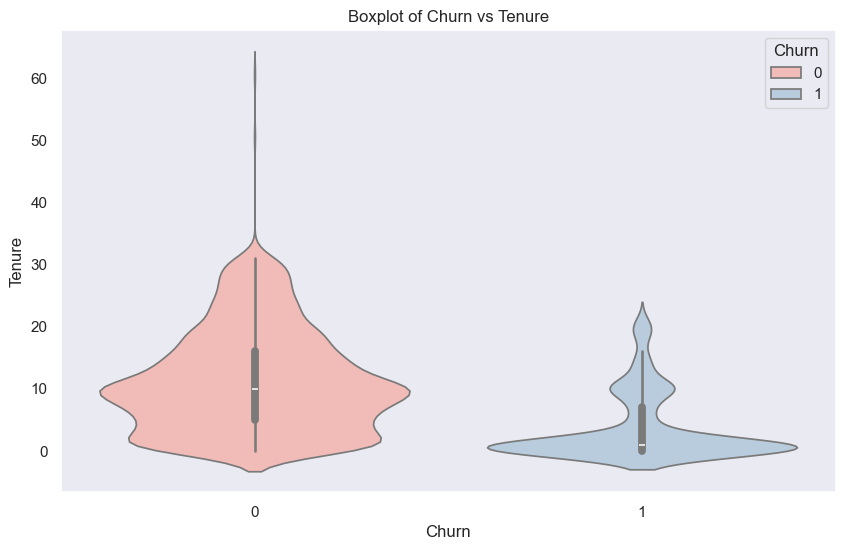

In [9]:
# Check Churn against Tenure

sns.set_theme(style = 'dark')

plt.figure(figsize=(10, 6))
sns.violinplot(x = 'Churn', y = 'Tenure', hue = 'Churn', data = qe, palette= 'Pastel1')

plt.title('Boxplot of Churn vs Tenure')
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.show()


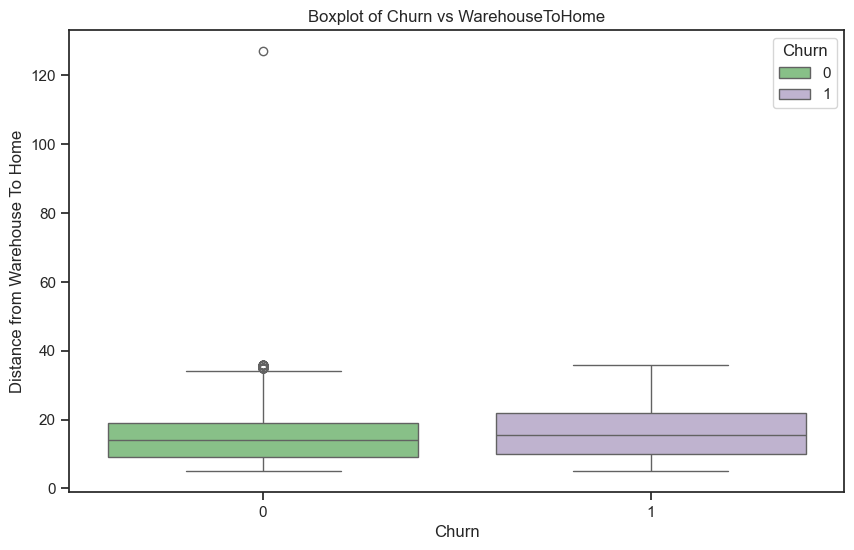

In [10]:
# Check Churn against WarehouseToHome

sns.set_theme(style = 'ticks')

plt.figure(figsize=(10, 6))
sns.boxplot(x = 'Churn', y = 'WarehouseToHome', hue = 'Churn', data = qe, palette= 'Accent')

plt.title('Boxplot of Churn vs WarehouseToHome')
plt.xlabel('Churn')
plt.ylabel('Distance from Warehouse To Home')
plt.show()


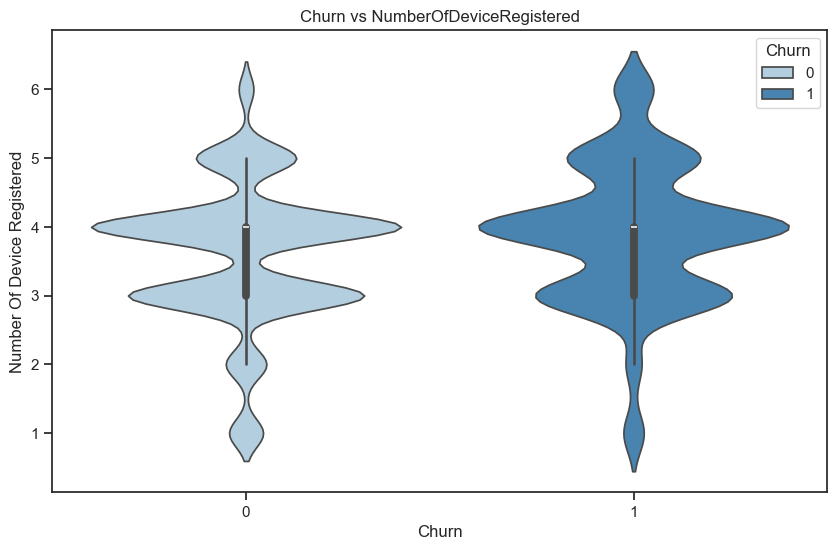

In [11]:
# Check Churn against NumberOfDeviceRegistered

sns.set_theme(style = 'ticks')

plt.figure(figsize=(10, 6))
sns.violinplot(y = 'NumberOfDeviceRegistered', x = 'Churn',  hue = 'Churn', data = qe, palette= 'Blues')

plt.title('Churn vs NumberOfDeviceRegistered')
plt.xlabel('Churn')
plt.ylabel('Number Of Device Registered')
plt.show()

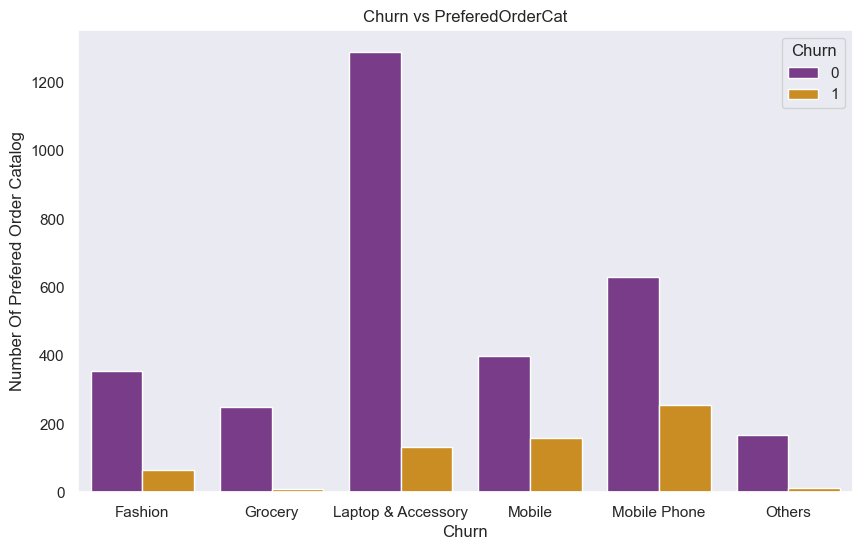

In [12]:
# Check Churn against PreferedOrderCat

sns.set_theme(style = 'dark')

plt.figure(figsize=(10, 6))

kat = qe.groupby(['PreferedOrderCat', 'Churn']).size().reset_index(name = 'Counts')

sns.barplot(x ='PreferedOrderCat', y ='Counts', hue = 'Churn', palette = 'CMRmap', data = kat)

plt.title('Churn vs PreferedOrderCat')
plt.xlabel('Churn')
plt.ylabel('Number Of Prefered Order Catalog')
plt.show()

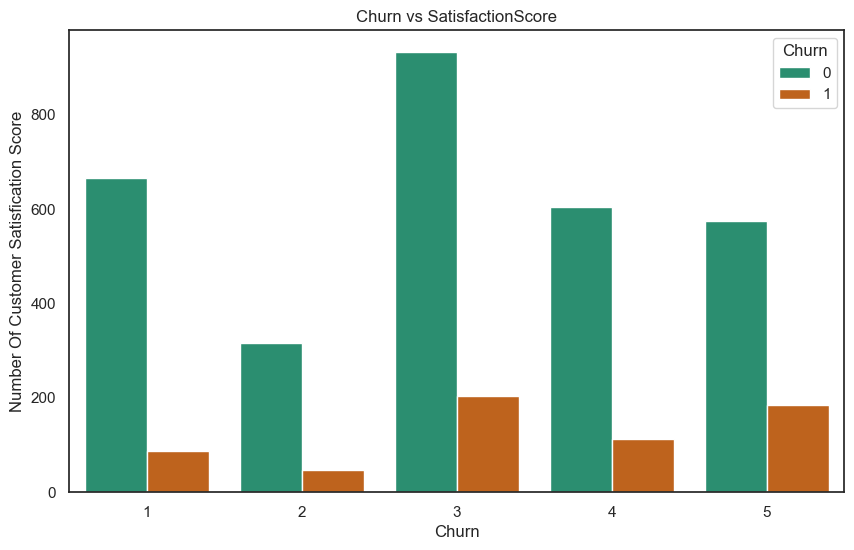

In [13]:
# Check Churn against SatisfactionScore

sns.set_theme(style = 'white')

plt.figure(figsize=(10, 6))

kat = qe.groupby(['SatisfactionScore', 'Churn']).size().reset_index(name = 'Counts')

sns.barplot(x ='SatisfactionScore', y ='Counts', hue = 'Churn', palette = 'Dark2', data = kat)

plt.title('Churn vs SatisfactionScore')
plt.xlabel('Churn')
plt.ylabel('Number Of Customer Satisfication Score')
plt.show()

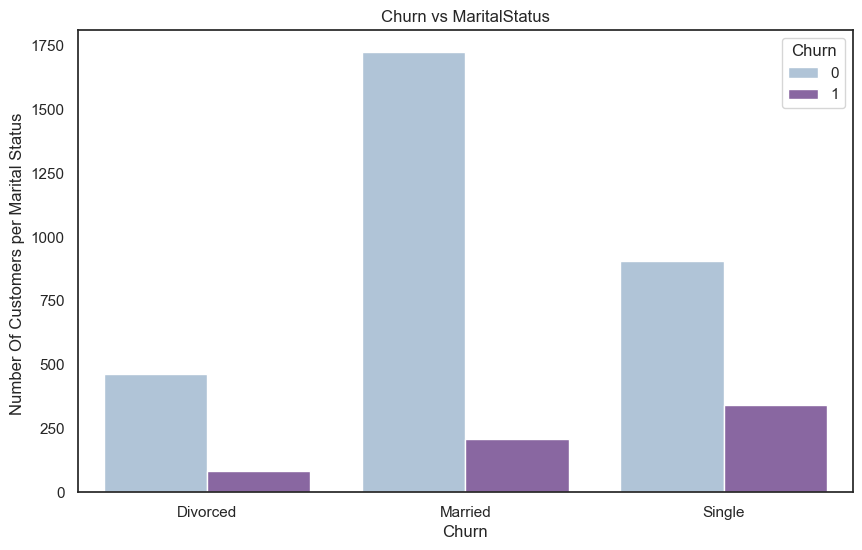

In [14]:
# Check Churn against MaritalStatus

sns.set_theme(style = 'white')

plt.figure(figsize=(10, 6))

kat = qe.groupby(['MaritalStatus', 'Churn']).size().reset_index(name = 'Counts')

sns.barplot(x ='MaritalStatus', y ='Counts', hue = 'Churn', palette = 'BuPu', data = kat)

plt.title('Churn vs MaritalStatus')
plt.xlabel('Churn')
plt.ylabel('Number Of Customers per Marital Status ')
plt.show()

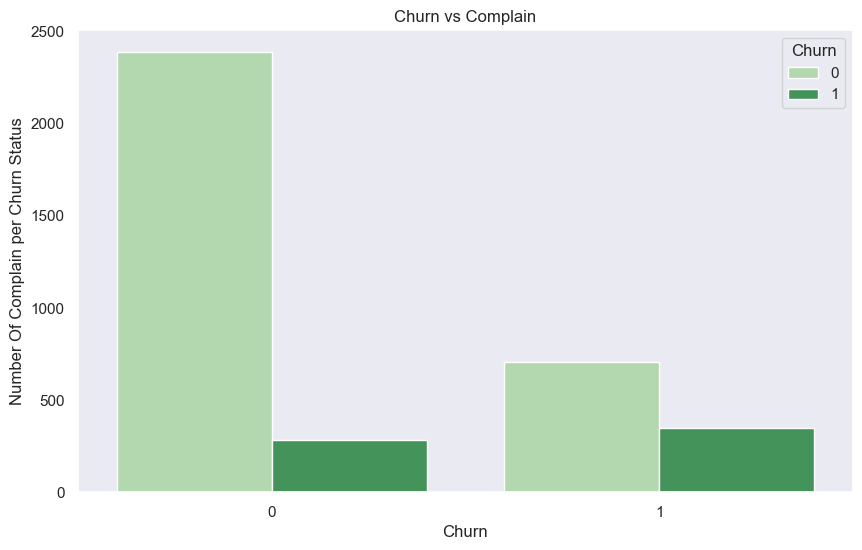

In [15]:
# Check Churn against Complain

sns.set_theme(style = 'dark')

plt.figure(figsize=(10, 6))

kat = qe.groupby(['Complain', 'Churn']).size().reset_index(name = 'Counts')

sns.barplot(x ='Complain', y ='Counts', hue = 'Churn', palette = 'Greens', data = kat)

plt.title('Churn vs Complain')
plt.xlabel('Churn')
plt.ylabel('Number Of Complain per Churn Status')
plt.show()

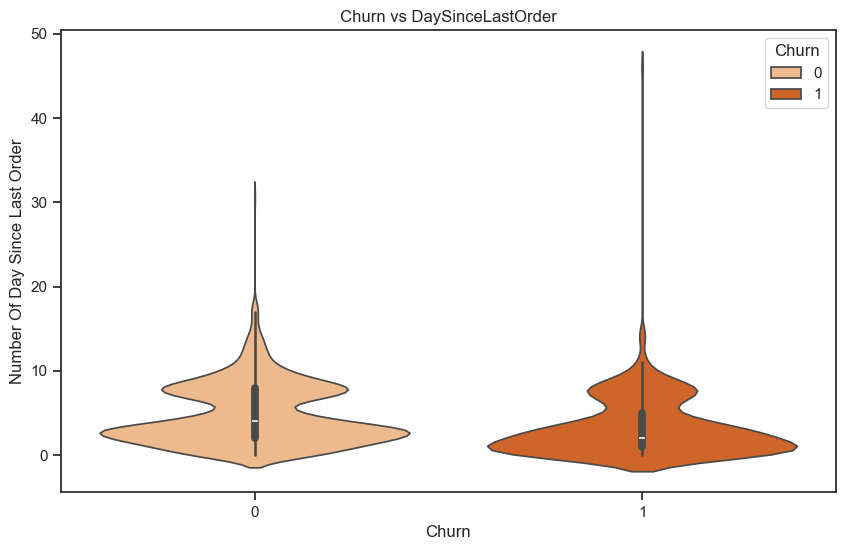

In [16]:
# Check Churn against DaySinceLastOrder

sns.set_theme(style = 'ticks')

plt.figure(figsize=(10, 6))
sns.violinplot(y = 'DaySinceLastOrder', x = 'Churn',  hue = 'Churn', data = qe, palette= 'Oranges')

plt.title('Churn vs DaySinceLastOrder')
plt.xlabel('Churn')
plt.ylabel('Number Of Day Since Last Order')
plt.show()


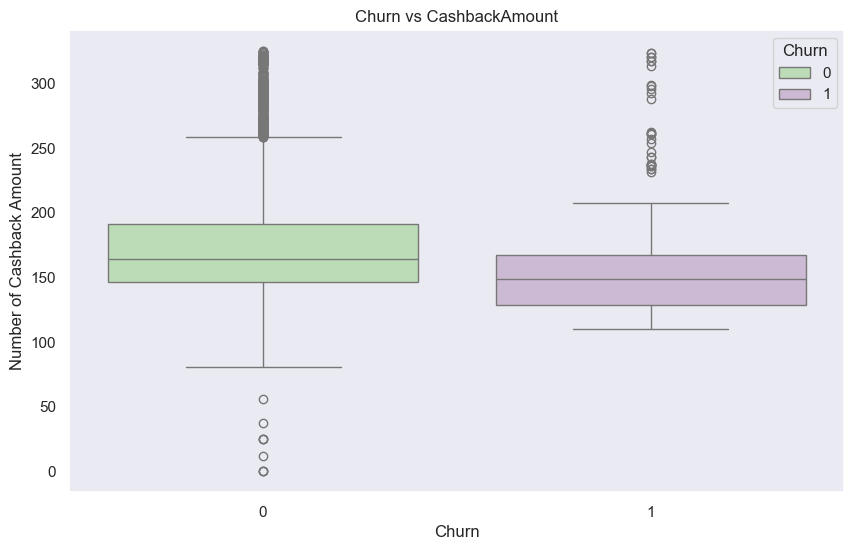

In [17]:
# Check Churn against CashbackAmount

sns.set_theme(style = 'dark')

plt.figure(figsize=(10, 6))
sns.boxplot(y = 'CashbackAmount', x = 'Churn',  hue = 'Churn', data = qe, palette= 'PRGn_r')

plt.title('Churn vs CashbackAmount')
plt.xlabel('Churn')
plt.ylabel('Number of Cashback Amount')
plt.show()


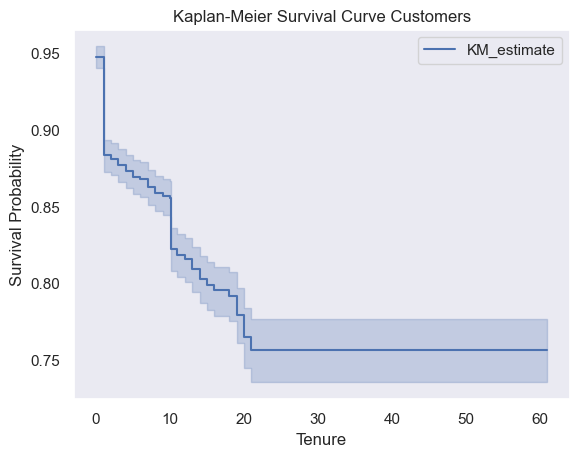

In [18]:
# Implement KaplanMeierFitter model

T = qe['Tenure']
E = qe['Churn']

k = KaplanMeierFitter()
k.fit(T, event_observed = E)

# Plotting the survival function

k.plot_survival_function()
plt.title('Kaplan-Meier Survival Curve Customers')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.show()



C:\Users\hocha\AppData\Local\Temp\ipykernel_12956\1976317375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qe['Tenure'] = qe['Tenure'].apply(lambda x: x if x > 0 else 1e-6)


           coef  se(coef)  coef lower 95%  coef upper 95%  cmp to    z    p  \
mu_       11.30      8.35           -5.07           27.66    0.00 1.35 0.18   
ln_sigma_  0.57      8.20          -15.51           16.66    0.00 0.07 0.94   
lambda_    3.27     26.79          -49.25           55.78    1.00 0.08 0.93   

           -log2(p)  
mu_            2.51  
ln_sigma_      0.08  
lambda_        0.10  


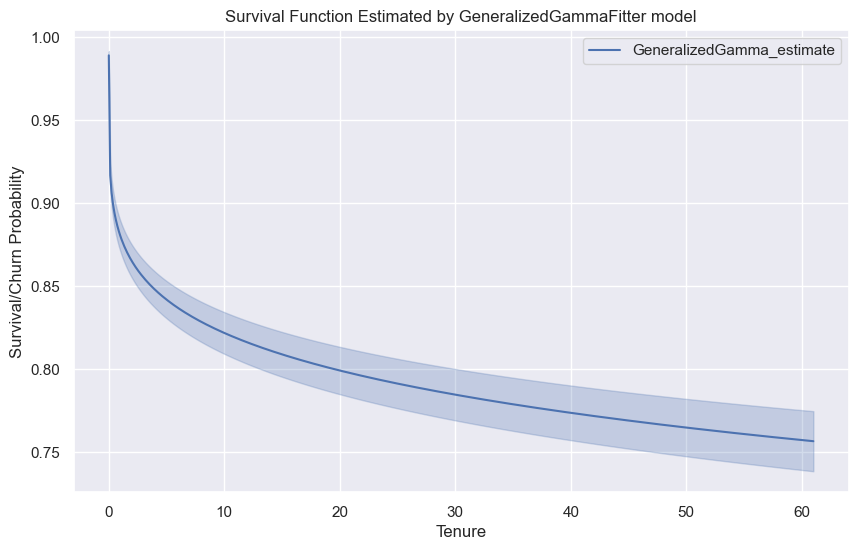

In [19]:
# implement the GeneralizedGammaFitter model

qe['Tenure'] = qe['Tenure'].apply(lambda x: x if x > 0 else 1e-6)

ggf = GeneralizedGammaFitter()

ggf.fit(qe['Tenure'], qe['Churn'])

# Print the summary of the fitted model
print(ggf.summary)

# Plot the survival function

plt.figure(figsize=(10, 6))
ggf.plot_survival_function()
plt.title('Survival Function Estimated by GeneralizedGammaFitter model')
plt.xlabel('Tenure')
plt.ylabel('Survival/Churn Probability')
plt.grid(True)
plt.show()


                                     coef  exp(coef)  se(coef)  \
covariate                                                        
WarehouseToHome                      0.02       1.02      0.00   
NumberOfDeviceRegistered             0.29       1.33      0.05   
SatisfactionScore                    0.20       1.22      0.03   
NumberOfAddress                      0.02       1.02      0.02   
Complain                             1.24       3.46      0.08   
DaySinceLastOrder                   -0.06       0.94      0.01   
CashbackAmount                      -0.01       0.99      0.00   
PreferedOrderCat_Grocery            -0.98       0.37      0.37   
PreferedOrderCat_Laptop & Accessory -0.68       0.51      0.18   
PreferedOrderCat_Mobile              0.19       1.21      0.23   
PreferedOrderCat_Mobile Phone        0.14       1.15      0.19   
PreferedOrderCat_Others              0.19       1.21      0.40   
MaritalStatus_Married               -0.36       0.70      0.13   
MaritalSta

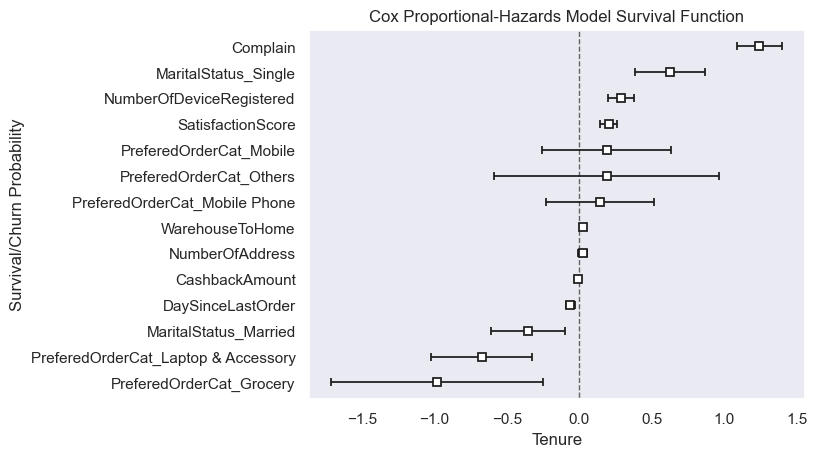

In [20]:
# Implement CoxPHFitter model

qi = pd.get_dummies(qe, columns=['PreferedOrderCat', 'MaritalStatus'], drop_first=True)
qi['Tenure'] = qi['Tenure'].apply(lambda x: x if x > 0 else 1e-6)

cpf = CoxPHFitter()
cpf.fit(qi, duration_col='Tenure', event_col='Churn')

# Print the summary of the model
print(cpf.summary)

# Plot the survival function

cpf.plot()
plt.title('Cox Proportional-Hazards Model Survival Function')
plt.xlabel('Tenure')
plt.ylabel('Survival/Churn Probability')
plt.show()